# Summary Statistics for Categorical Data

In [96]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [97]:
# Downloaded data from https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh and deleted all but the first 1000 rows.
nyc_trees_all_columns = pd.read_csv('2015_Street_Tree_Census_-_Tree_Data_-_Filtered_By_Stump_Diam.csv')
nyc_trees = nyc_trees_all_columns[['tree_id', 'stump_diam', 'status', 'health', 'spc_common', 'nta_name']]
print(nyc_trees.head())
print(nyc_trees.dtypes)


   tree_id  stump_diam status health spc_common                     nta_name
0   211205          16  Stump    NaN        NaN                     Steinway
1   203597          15  Stump    NaN        NaN                     Steinway
2   179766          30  Stump    NaN        NaN                     Flatbush
3   180619          10  Stump    NaN        NaN                 Forest Hills
4   208828          15  Stump    NaN        NaN  Lenox Hill-Roosevelt Island
tree_id        int64
stump_diam     int64
status        object
health        object
spc_common    object
nta_name      object
dtype: object
C:\Users\Johnny\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7,8,9,10,11,12,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [98]:
print(nyc_trees['status'].unique())
print(nyc_trees['health'].unique())
print(nyc_trees['nta_name'].value_counts())

['Stump' 'Alive' 'Dead']
[nan 'Fair' 'Good' 'Poor']
Breezy Point-Belle Harbor-Rockaway Park-Broad Channel    409
Forest Hills                                             322
Queens Village                                           319
Rossville-Woodrow                                        314
St. Albans                                               306
                                                        ... 
West Brighton                                             18
Manhattanville                                            11
Parkchester                                               10
Stuyvesant Town-Cooper Village                             9
Starrett City                                              6
Name: nta_name, Length: 188, dtype: int64


## Modal category

For nominal category, `spc_common`.

The most common (i.e. mode) specie (i.e. spc_common) and its frequency is:

In [99]:
print(nyc_trees['spc_common'].value_counts().index[0])
print(nyc_trees['spc_common'].value_counts()[0])
nyc_trees['spc_common'].value_counts().head(1)

honeylocust
201


honeylocust    201
Name: spc_common, dtype: int64

## Ordinal Categorial Median

In [100]:
nyc_trees['health'].dropna().unique()

array(['Fair', 'Good', 'Poor'], dtype=object)

In [101]:
ordered_health = pd.Categorical(nyc_trees['health'].dropna(), ['Poor', 'Fair', 'Good'], ordered=True)
print(ordered_health)

['Fair', 'Fair', 'Good', 'Good', 'Good', ..., 'Good', 'Fair', 'Poor', 'Good', 'Good']
Length: 971
Categories (3, object): ['Poor' < 'Fair' < 'Good']


In [102]:
# Median

# Interestingly, if we were to to find the categorical code within the dataframe itself, I would need to use 'cat': nyc_trees['column'].cat.codes
median_index = np.median(ordered_health.codes)
median_heath_status = ordered_health[int(median_index)] #Convert to int because median_index is a float
print(median_index)
print(median_heath_status)

# Note: While we can calculate the median of an ordinal category, the mean is only meaningful if the  spacing between each category is equal.

2.0
Good


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72, 74, 76, 77, 78, 79, 80, 82, 84, 85, 86, 87, 89, 90, 92, 96, 98, 99, 100, 104, 107, 109, 115, 118, 120, 125, 131, 134, 140]


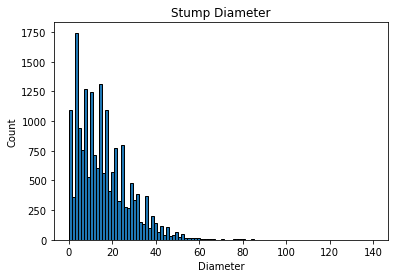

(array([1095,  363, 1745,  940,  754, 1272,  530, 1242,  717,  609, 1312,
         559, 1094,  410,  572,  775,  330,  803,  273,  272,  476,  339,
         386,  148,  136,  367,  100,  197,  141,   63,  114,   43,  106,
          29,   39,   68,   24,   48,   16,   15,   12,   12,   16,    5,
           4,    8,    8,    7,    0,    2,    7,    1,    2,    0,    3,
           8,    3,    4,    1,    0,    6,    1,    2,    2,    2,    1,
           0,    0,    1,    0,    2,    2,    0,    0,    1,    0,    1,
           1,    0,    0,    0,    0,    1,    0,    1,    1,    0,    0,
           0,    1,    0,    0,    0,    1,    0,    1,    0,    0,    0,
           1], dtype=int64),
 array([  0. ,   1.4,   2.8,   4.2,   5.6,   7. ,   8.4,   9.8,  11.2,
         12.6,  14. ,  15.4,  16.8,  18.2,  19.6,  21. ,  22.4,  23.8,
         25.2,  26.6,  28. ,  29.4,  30.8,  32.2,  33.6,  35. ,  36.4,
         37.8,  39.2,  40.6,  42. ,  43.4,  44.8,  46.2,  47.6,  49. ,
         50.4,  51.8,

In [103]:
# In the Codeacamedy course, we were given the stump_diam_category column. We don't have it, so we need to create it.
#
# First, find the data spread of stump_diam so that we can create an ordinal category from it

print(sorted(nyc_trees.stump_diam.unique()))
plt.hist(nyc_trees.stump_diam, bins=100, edgecolor='black')

plt.title("Stump Diameter")
plt.xlabel("Diameter")
plt.ylabel("Count")

plt.show()

np.histogram(nyc_trees.stump_diam, bins=100)

# Add an ordinal category for stump_diam called stump_diam_category


In [104]:
# Now create the ordinal category

size_labels_ordered = ['Small (0-3in)', 'Medium (3-10in)', 'Medium-Large (10-18in)', 'Large (18-24in)','Very large (>24in)']

stump_diam_category = pd.cut(nyc_trees.stump_diam, [-np.inf, 3, 10, 18, 24, np.inf], labels = size_labels_ordered)

nyc_trees = nyc_trees.assign(stump_diam_category = stump_diam_category.values)
nyc_trees.head()

,tree_id,stump_diam,status,health,spc_common,nta_name,stump_diam_category
0,211205,16,Stump,NaN,NaN,Steinway,Medium-Large (10-18in)
1,203597,15,Stump,NaN,NaN,Steinway,Medium-Large (10-18in)
2,179766,30,Stump,NaN,NaN,Flatbush,Very large (>24in)
3,180619,10,Stump,NaN,NaN,Forest Hills,Medium (3-10in)
4,208828,15,Stump,NaN,NaN,Lenox Hill-Roosevelt Island,Medium-Large (10-18in)


In [105]:
# Convert stump_diam_category back to a category column, even though we intentionally saved it as string in the previous step for the purpose of this exercise

nyc_trees.stump_diam_category = pd.Categorical(nyc_trees.stump_diam_category, size_labels_ordered, ordered=True)

# Calculate 25th Percentile Category

twenty_five_percentile_index = np.percentile(nyc_trees.stump_diam_category.cat.codes, 25)
p25_tree_diam_category  = size_labels_ordered[int(twenty_five_percentile_index)]
print(p25_tree_diam_category)

# Calculate 75th Percentile Category
seventy_five_percentile_index = np.percentile(nyc_trees.stump_diam_category.cat.codes, 75)
p75_tree_diam_category  = size_labels_ordered[int(seventy_five_percentile_index)]
print(p75_tree_diam_category)

Medium (3-10in)
Large (18-24in)


In [122]:
# Let's get frequency of the stump diameter category

print(nyc_trees.stump_diam_category.value_counts(dropna=True))

# Note: value_counts() also works on strings

# print(type(nyc_trees.stump_diam_category))

Medium (3-10in)           5179
Medium-Large (10-18in)    4816
Very large (>24in)        3931
Large (18-24in)           2491
Small (0-3in)             2237
Name: stump_diam_category, dtype: int64


In [123]:
# Proportions

print(nyc_trees.stump_diam_category.value_counts(dropna=True) / len(nyc_trees.stump_diam_category))

# Or easier:

print(nyc_trees.stump_diam_category.value_counts(dropna=True, normalize=True))

Medium (3-10in)           0.277635
Medium-Large (10-18in)    0.258175
Very large (>24in)        0.210732
Large (18-24in)           0.133537
Small (0-3in)             0.119921
Name: stump_diam_category, dtype: float64
Medium (3-10in)           0.277635
Medium-Large (10-18in)    0.258175
Very large (>24in)        0.210732
Large (18-24in)           0.133537
Small (0-3in)             0.119921
Name: stump_diam_category, dtype: float64


In [127]:
# Frequency and Proportion

living_frequency = (nyc_trees.status == 'Alive').sum()
living_proportion  = (nyc_trees.status == 'Alive').mean()
print(living_frequency, living_proportion)

giant_frequency  = (nyc_trees.stump_diam > 30).sum()
giant_proportion  = (nyc_trees.stump_diam > 30).mean()
print(giant_frequency , giant_proportion)

971 0.05205317894285408
2172 0.11643615310389192
